**Step 1: Importing the libraries**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.datasets import load_wine
from sklearn.pipeline import make_pipeline

**Step 2: Importing dataset**

In [2]:
data = pd.read_csv("glassdata.txt", sep=",", header=None, 
                 names=["Id", "refractive_index","Sodium","Magnesium","Aluminum",
                       "Silicon","Potassium","Calcium","Barium","Iron","glass_type"])

In [3]:
data

,Id,refractive_index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,glass_type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
data.describe()

,Id,refractive_index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,glass_type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


**Step 3: Handling the missing data**

In [5]:
data.isnull().sum()

Id                  0
refractive_index    0
Sodium              0
Magnesium           0
Aluminum            0
Silicon             0
Potassium           0
Calcium             0
Barium              0
Iron                0
glass_type          0
dtype: int64

**Step 4: Encoding categorical data**

In [6]:
#Not required already encoded

**Step 5: Creating a dummy variable**

Here we are creating a dummy variable called glass kind which will be also over target variable.
"0" represents Non-window glass and "1" represents Window Glass

In [7]:
new_data ={1:1,2:1,3:1,4:1,5:0,6:0,7:0}
data['glass_kind'] = data['glass_type'].map(new_data)
data

,Id,refractive_index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,glass_type,glass_kind
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7,0
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7,0
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7,0
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7,0


In [8]:
data =data.drop('Id',1)

C:\Users\Alan\AppData\Local\Temp/ipykernel_4380/270498476.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data =data.drop('Id',1)


**Step 6: Splitting the datasets into training sets and Test sets**

**Step 7: Feature Scaling**

<AxesSubplot:>

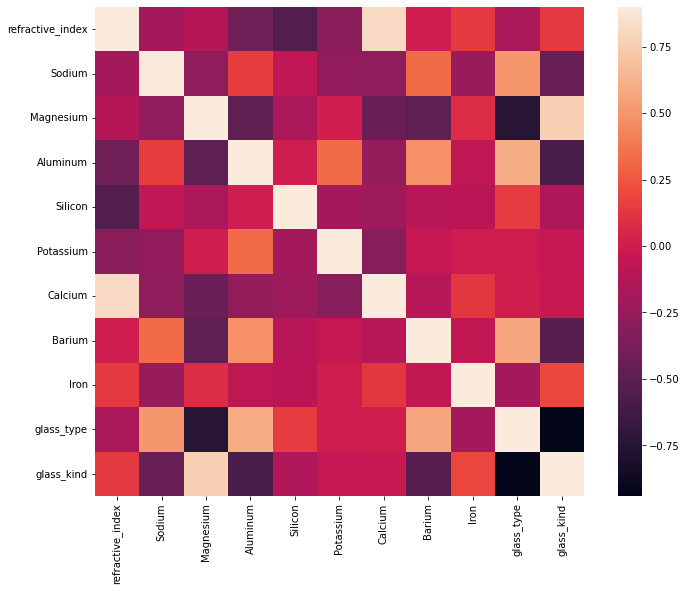

In [9]:
cor = data.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(cor, vmax=0.9, square=True)

C:\Users\Alan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 0.76 and sigma = 0.43



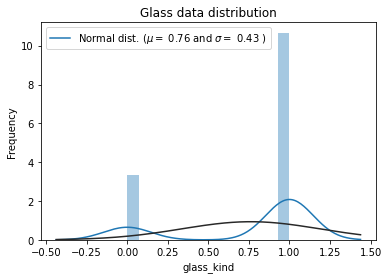

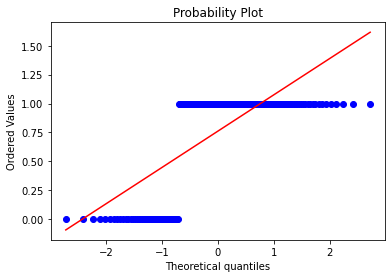

In [10]:
sns.distplot(data['glass_kind'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data['glass_kind'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Glass data distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(data['glass_kind'], plot=plt)
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
x= data.iloc[:,0:9]
y = data['glass_kind']
y_alt = ['glass_type']

In [12]:
# Make a train/test split using 30% test size
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

# Fit to data and predict using pipelined GNB and PCA.
unscaled_clf = make_pipeline(PCA(n_components=2), GaussianNB())
unscaled_clf.fit(X_train, y_train)
pred_test = unscaled_clf.predict(X_test)

# Fit to data and predict using pipelined scaling, GNB and PCA.
std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), GaussianNB())
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)

# Show prediction accuracies in scaled and unscaled data.
norm_pred_accuracy = metrics.accuracy_score(y_test, pred_test)
std_pred_accuracy = metrics.accuracy_score(y_test, pred_test_std)
print(f'Prediction accuracy for the normal test dataset with PCA: {norm_pred_accuracy}')
print(f'Prediction accuracy for the standardized test dataset with PCA: {std_pred_accuracy}')

Prediction accuracy for the normal test dataset with PCA: 0.8769230769230769
Prediction accuracy for the standardized test dataset with PCA: 0.8461538461538461


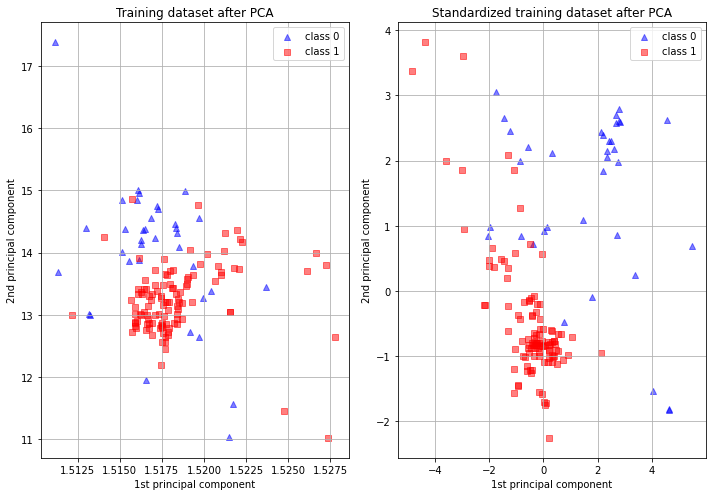

In [13]:
pca = unscaled_clf.named_steps['pca']
pca_std = std_clf.named_steps['pca']

# Scale and use PCA on X_train data for visualization.
scaler = std_clf.named_steps['standardscaler']
X_train_std = pca_std.transform(scaler.transform(X_train))

# Visualize original vs standarized dataset with PCA performed
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 7))
for l, c,m in zip(range(0, 2), ('blue', 'red'), ('^', 's')):
    ax1.scatter(X_train.to_numpy()[y_train == l, 0], X_train.to_numpy()[y_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

for l, c, m in zip(range(0, 3), ('blue', 'red'), ('^', 's')):
    ax2.scatter(X_train_std[y_train == l, 0], X_train_std[y_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

ax1.set_title('Training dataset after PCA')
ax2.set_title('Standardized training dataset after PCA')

for ax in (ax1, ax2):
    ax.set_xlabel('1st principal component')
    ax.set_ylabel('2nd principal component')
    ax.legend(loc='upper right')
    ax.grid()

plt.tight_layout()
plt.show()

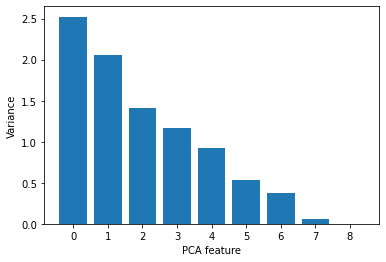

In [14]:
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,pca)

# Fit the pipeline to 'samples'
pipeline.fit(x)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features)
plt.show()

In [15]:

# scaled samples
scaler = StandardScaler()
scaled_samples = scaler.fit_transform(x)


# Create a PCA model with 2 components: pca
pca = PCA(n_components=5)

# Fit the PCA instance to the scaled samples
a = pca.fit(scaled_samples)

# Transform the scaled samples: pca_features
pca_features = pca.transform(scaled_samples)

# Print the shape of pca_features
print(f'Scaled samples:\n{scaled_samples[1:5,:]}\n')
print(f'PCA features shape:\n{pca_features.shape}\n')
print(f'PCA Features:\n{pca_features[1:10,:]}\n')

Scaled samples:
[[-0.24933347  0.59181718  0.63616803 -0.17046023  0.10231907 -0.02621325
  -0.79373376 -0.35287683 -0.5864509 ]
 [-0.72131806  0.14993314  0.60142249  0.19091171  0.43878673 -0.16453301
  -0.82894938 -0.35287683 -0.5864509 ]
 [-0.23283051 -0.24285268  0.69870999 -0.31099376 -0.0529737   0.11210651
  -0.51905192 -0.35287683 -0.5864509 ]
 [-0.31204471 -0.16920534  0.65006624 -0.41137486  0.55525631  0.08136879
  -0.62469878 -0.35287683 -0.5864509 ]]

PCA features shape:
(214, 5)

PCA Features:
[[-0.57413717 -0.75978777 -0.55670817  0.76023228 -0.25707069]
 [-0.94015972 -0.92983597 -0.55490744  0.20625431 -0.23750587]
 [-0.14208328 -0.96167744 -0.11712469  0.41572402 -0.4762989 ]
 [-0.35109229 -1.09124921 -0.48507869  0.0691023  -0.43208994]
 [-0.29026658 -1.32400756  0.86867862 -0.9277974   1.81466061]
 [-0.25267144 -1.11614958 -0.54063785  0.08032811 -0.45852343]
 [-0.12029947 -1.22184622 -0.62474224 -0.11602208 -0.49457504]
 [-0.02081603 -0.32193261 -0.10905968  1.3716

In [16]:
import numpy as np
n_pcs= pca.components_.shape[0]

# get the index of the most important feature on EACH component i.e. largest absolute value
# using LIST COMPREHENSION HERE
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = x.columns

# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# using LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i+1): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(sorted(dic.items()))

In [17]:
df

,0,1
0,PC1,refractive_index
1,PC2,Magnesium
2,PC3,Potassium
3,PC4,Silicon
4,PC5,Iron


In [18]:
pca_features

array([[ 1.15113957, -0.52948764, -0.37209565,  1.72890103, -0.25193583],
       [-0.57413717, -0.75978777, -0.55670817,  0.76023228, -0.25707069],
       [-0.94015972, -0.92983597, -0.55490744,  0.20625431, -0.23750587],
       ...,
       [-1.68024627,  3.28482346, -0.93034851, -0.17101386,  0.45168739],
       [-2.36974768,  2.7568728 , -1.23470076, -0.52528451,  0.51500795],
       [-2.26264885,  3.02859155, -0.89084474, -0.41449108,  0.50547398]])

In [19]:
n_data = pd.DataFrame(pca_features,columns=list(df[1]))
n_data['glass_kind'] = data['glass_kind']

In [20]:
n_data

,refractive_index,Magnesium,Potassium,Silicon,Iron,glass_kind
0,1.151140,-0.529488,-0.372096,1.728901,-0.251936,1
1,-0.574137,-0.759788,-0.556708,0.760232,-0.257071,1
2,-0.940160,-0.929836,-0.554907,0.206254,-0.237506,1
3,-0.142083,-0.961677,-0.117125,0.415724,-0.476299,1
4,-0.351092,-1.091249,-0.485079,0.069102,-0.432090,1
...,...,...,...,...,...,...
209,-2.383835,3.061677,0.090445,-0.376611,0.103227,0
210,-2.397652,3.108236,-1.117502,0.288454,0.624723,0
211,-1.680246,3.284823,-0.930349,-0.171014,0.451687,0
212,-2.369748,2.756873,-1.234701,-0.525285,0.515008,0


# Model 1: Logistic Regression

In [21]:
x1 =n_data.iloc[:,0:5]
y1 = n_data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.30)

In [22]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [23]:
print(f'model score on training data: {lr.score(X_train, y_train)}')
print(f'model score on testing data: {lr.score(X_test, y_test)}')

model score on training data: 0.9463087248322147
model score on testing data: 0.9384615384615385


In [24]:
from sklearn.metrics import roc_auc_score
roc_lr = roc_auc_score(y_test, lr.decision_function(X_test))
print('ROC score: ',roc_lr)

ROC score:  0.9386666666666666


C:\Users\Alan\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


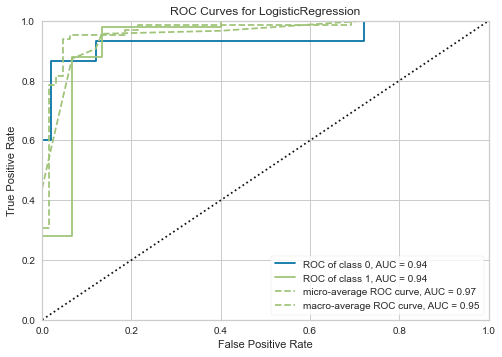

In [25]:
from yellowbrick.classifier import ROCAUC
def rocauc(clf, X_train, y_train,X_test, y_test):
    visualizer = ROCAUC(clf)
    visualizer.fit(X_train, y_train) # Fit the training data to the visualizer
    visualizer.score(X_test, y_test) # Evaluate the model on the test data
    g = visualizer.poof() 
rocauc(lr, X_train, y_train,X_test, y_test)

C:\Users\Alan\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


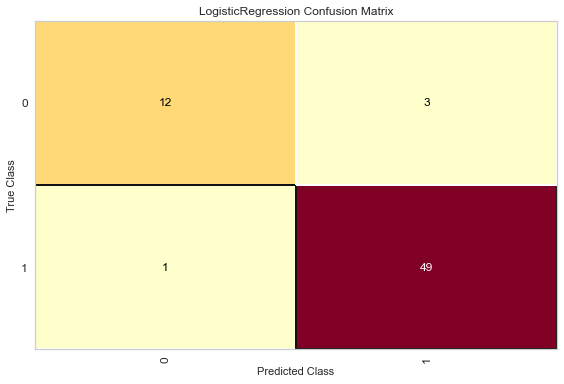

In [26]:
from yellowbrick.classifier import ConfusionMatrix,ClassificationReport
def ConfusionMat(clf, X_train, y_train,X_test, y_test): 
    cm = ConfusionMatrix(clf, classes=[0,1])
    cm.fit(X_train, y_train)
    cm.score(X_test, y_test)
    cm.poof()
ConfusionMat(lr, X_train, y_train,X_test, y_test)

C:\Users\Alan\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


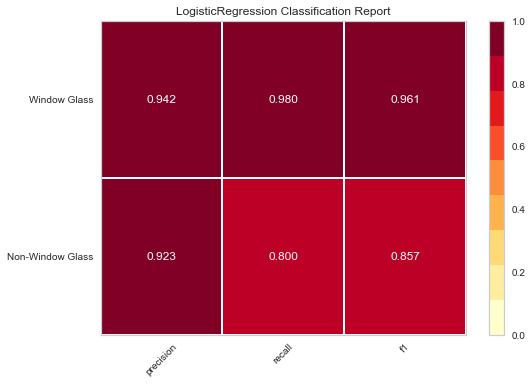

In [27]:
def ClassificationRep(clf, X_train, y_train,X_test, y_test):
    visualizer = ClassificationReport(clf, classes=['Non-Window Glass','Window Glass'])
    visualizer.fit(X_train, y_train) 
    visualizer.score(X_test, y_test) # Evaluate the model on the test data
    g = visualizer.poof()
ClassificationRep(lr, X_train, y_train,X_test, y_test)

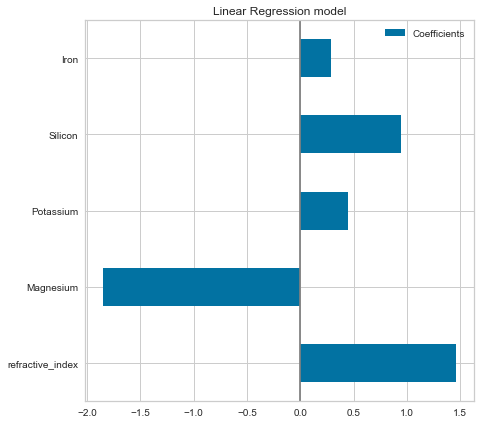

In [28]:
coefs = pd.DataFrame(
   lr.coef_.reshape(-1),
   columns=['Coefficients'], index=X_train.columns
)
coefs.sort_values(by='Coefficients',ascending=False, inplace=False)
coefs.plot(kind='barh', figsize=(9, 7))
plt.title('Linear Regression model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

# Model 2: KNN

Minimum error:- 0.1076923076923077 at K = 21


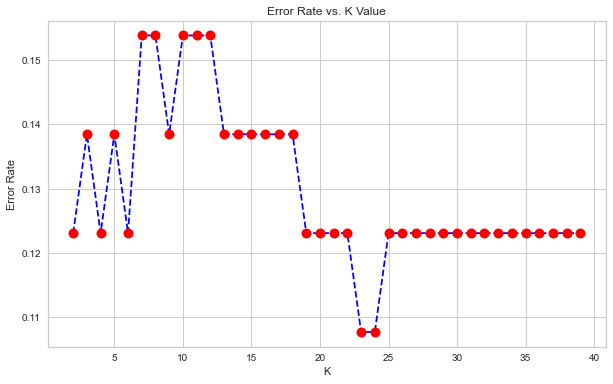

In [29]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
for i in range(2,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    k_value = error_rate.index(min(error_rate))  
if error_rate.index(min(error_rate)) == 0:
    k_value = 2
                    
plt.figure(figsize=(10,6))
plt.plot(range(2,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')                 
print("Minimum error:-",min(error_rate),"at K =",k_value)

In [30]:
neigh = KNeighborsClassifier(n_neighbors=k_value).fit(X_train, y_train)

In [31]:
print(f'model score on training data: {lr.score(X_train, y_train)}')
print(f'model score on testing data: {lr.score(X_test, y_test)}')

model score on training data: 0.9463087248322147
model score on testing data: 0.9384615384615385


In [32]:
pred_prob1 = neigh.predict_proba(X_test)
roc_knn = roc_auc_score(y_test, pred_prob1[:,1])

print('ROC score: ',roc_knn)

ROC score:  0.9620000000000001


C:\Users\Alan\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


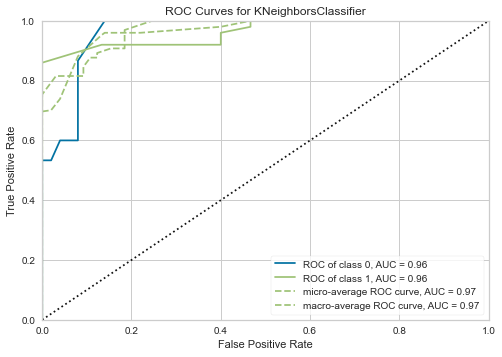

In [33]:
rocauc(neigh, X_train, y_train,X_test, y_test)

C:\Users\Alan\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


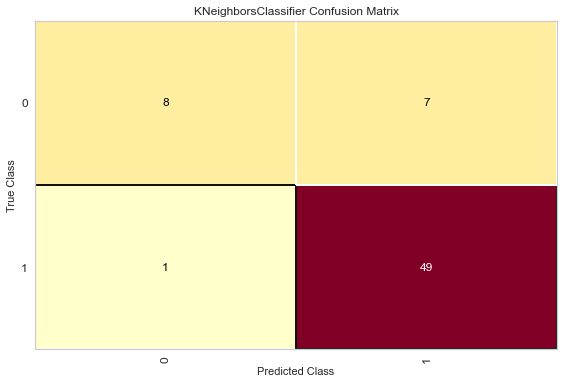

In [34]:
ConfusionMat(neigh, X_train, y_train,X_test, y_test)

C:\Users\Alan\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


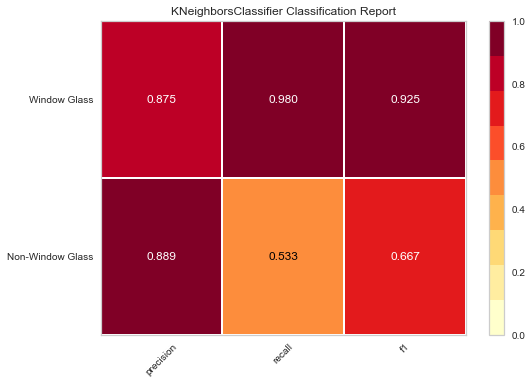

In [35]:
ClassificationRep(neigh, X_train, y_train,X_test, y_test)

# Model 3: SVM

In [36]:
from sklearn.svm import SVC
kernels=['linear', 'poly', 'rbf', 'sigmoid']
kernel=[]
roc_val=[]
for i in kernels:
    svm = SVC(kernel = i, verbose=True,probability=True).fit(X_train, y_train)
    roc = roc_auc_score(y_test, svm.decision_function(X_test))
    kernel.append(i)
    roc_val.append(roc)
print(roc_val)
print(kernel)
max_index = roc_val.index(max(roc_val))
k = kernel[max_index]

[LibSVM][LibSVM][LibSVM][LibSVM][0.944, 0.9453333333333334, 0.964, 0.8586666666666667]
['linear', 'poly', 'rbf', 'sigmoid']


[LibSVM]ROC score:  0.964


ClassificationReport


C:\Users\Alan\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


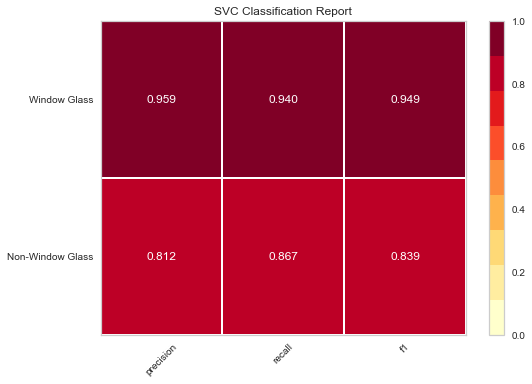

------------------------------------------------------------------------------------------


Confusion Matrix


C:\Users\Alan\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


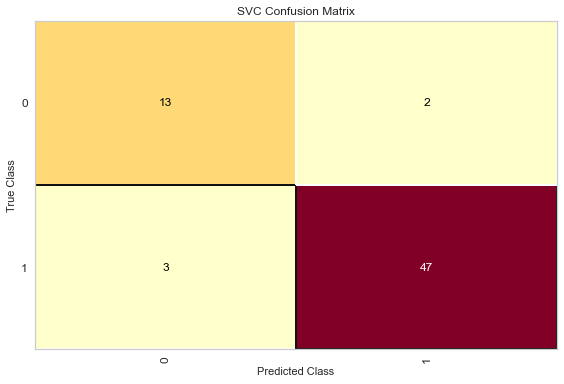

In [37]:
def svm(x,y,k,X_test,y_test):
    svm = SVC(kernel = k, verbose=True,probability=True).fit(x, y)
    roc = roc_auc_score(y_test, svm.decision_function(X_test))
    print('ROC score: ',roc)
    print('\n')
    print('ClassificationReport')
    ClassificationRep(svm, x, y,X_test, y_test)
    print('------------------------------------------------------------------------------------------')
    print('\n')
    print('Confusion Matrix')
    ConfusionMat(svm, x, y,X_test, y_test)
    return svm, roc
sv = svm(X_train, y_train,k,X_test,y_test)
roc_svm = sv[1]
svm_clf = sv[0]

# Model 4: Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_features=None).fit(X_train, y_train)

C:\Users\Alan\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


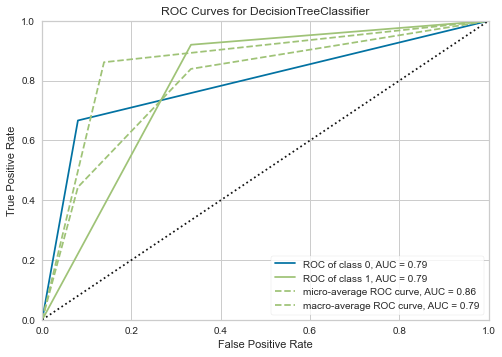

In [39]:
rocauc(dt, X_train, y_train,X_test, y_test)

In [40]:
from sklearn.metrics import roc_curve, auc
y_score = dt.fit(X_train, y_train).predict(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_dt = auc(fpr, tpr)
roc_dt

0.88

C:\Users\Alan\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


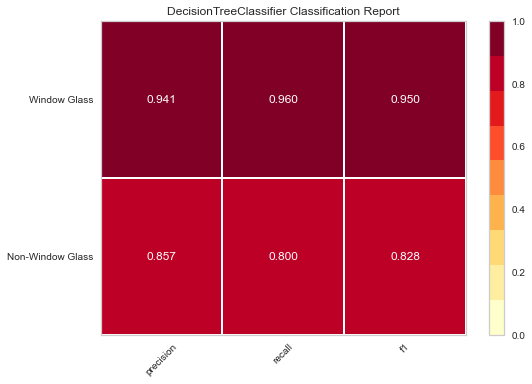

In [41]:
ClassificationRep(dt, X_train, y_train,X_test, y_test)

C:\Users\Alan\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


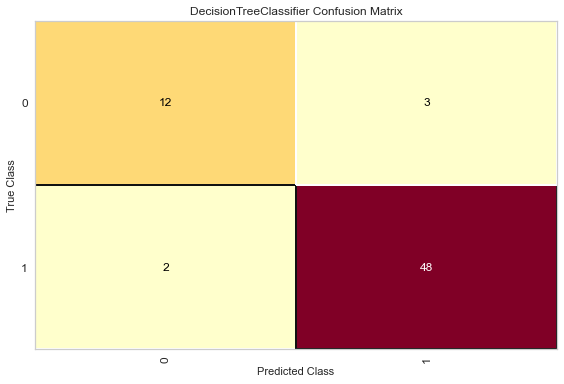

In [42]:
ConfusionMat(dt, X_train, y_train,X_test, y_test)

In [43]:
from sklearn import tree
text_representation = tree.export_text(dt)
print(text_representation)

|--- feature_1 <= 0.21
|   |--- feature_0 <= -2.80
|   |   |--- class: 0
|   |--- feature_0 >  -2.80
|   |   |--- class: 1
|--- feature_1 >  0.21
|   |--- feature_0 <= 2.45
|   |   |--- feature_0 <= 1.04
|   |   |   |--- feature_1 <= 0.60
|   |   |   |   |--- feature_3 <= 0.93
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_3 >  0.93
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  0.60
|   |   |   |   |--- class: 0
|   |   |--- feature_0 >  1.04
|   |   |   |--- feature_3 <= -0.51
|   |   |   |   |--- class: 0
|   |   |   |--- feature_3 >  -0.51
|   |   |   |   |--- class: 1
|   |--- feature_0 >  2.45
|   |   |--- class: 1



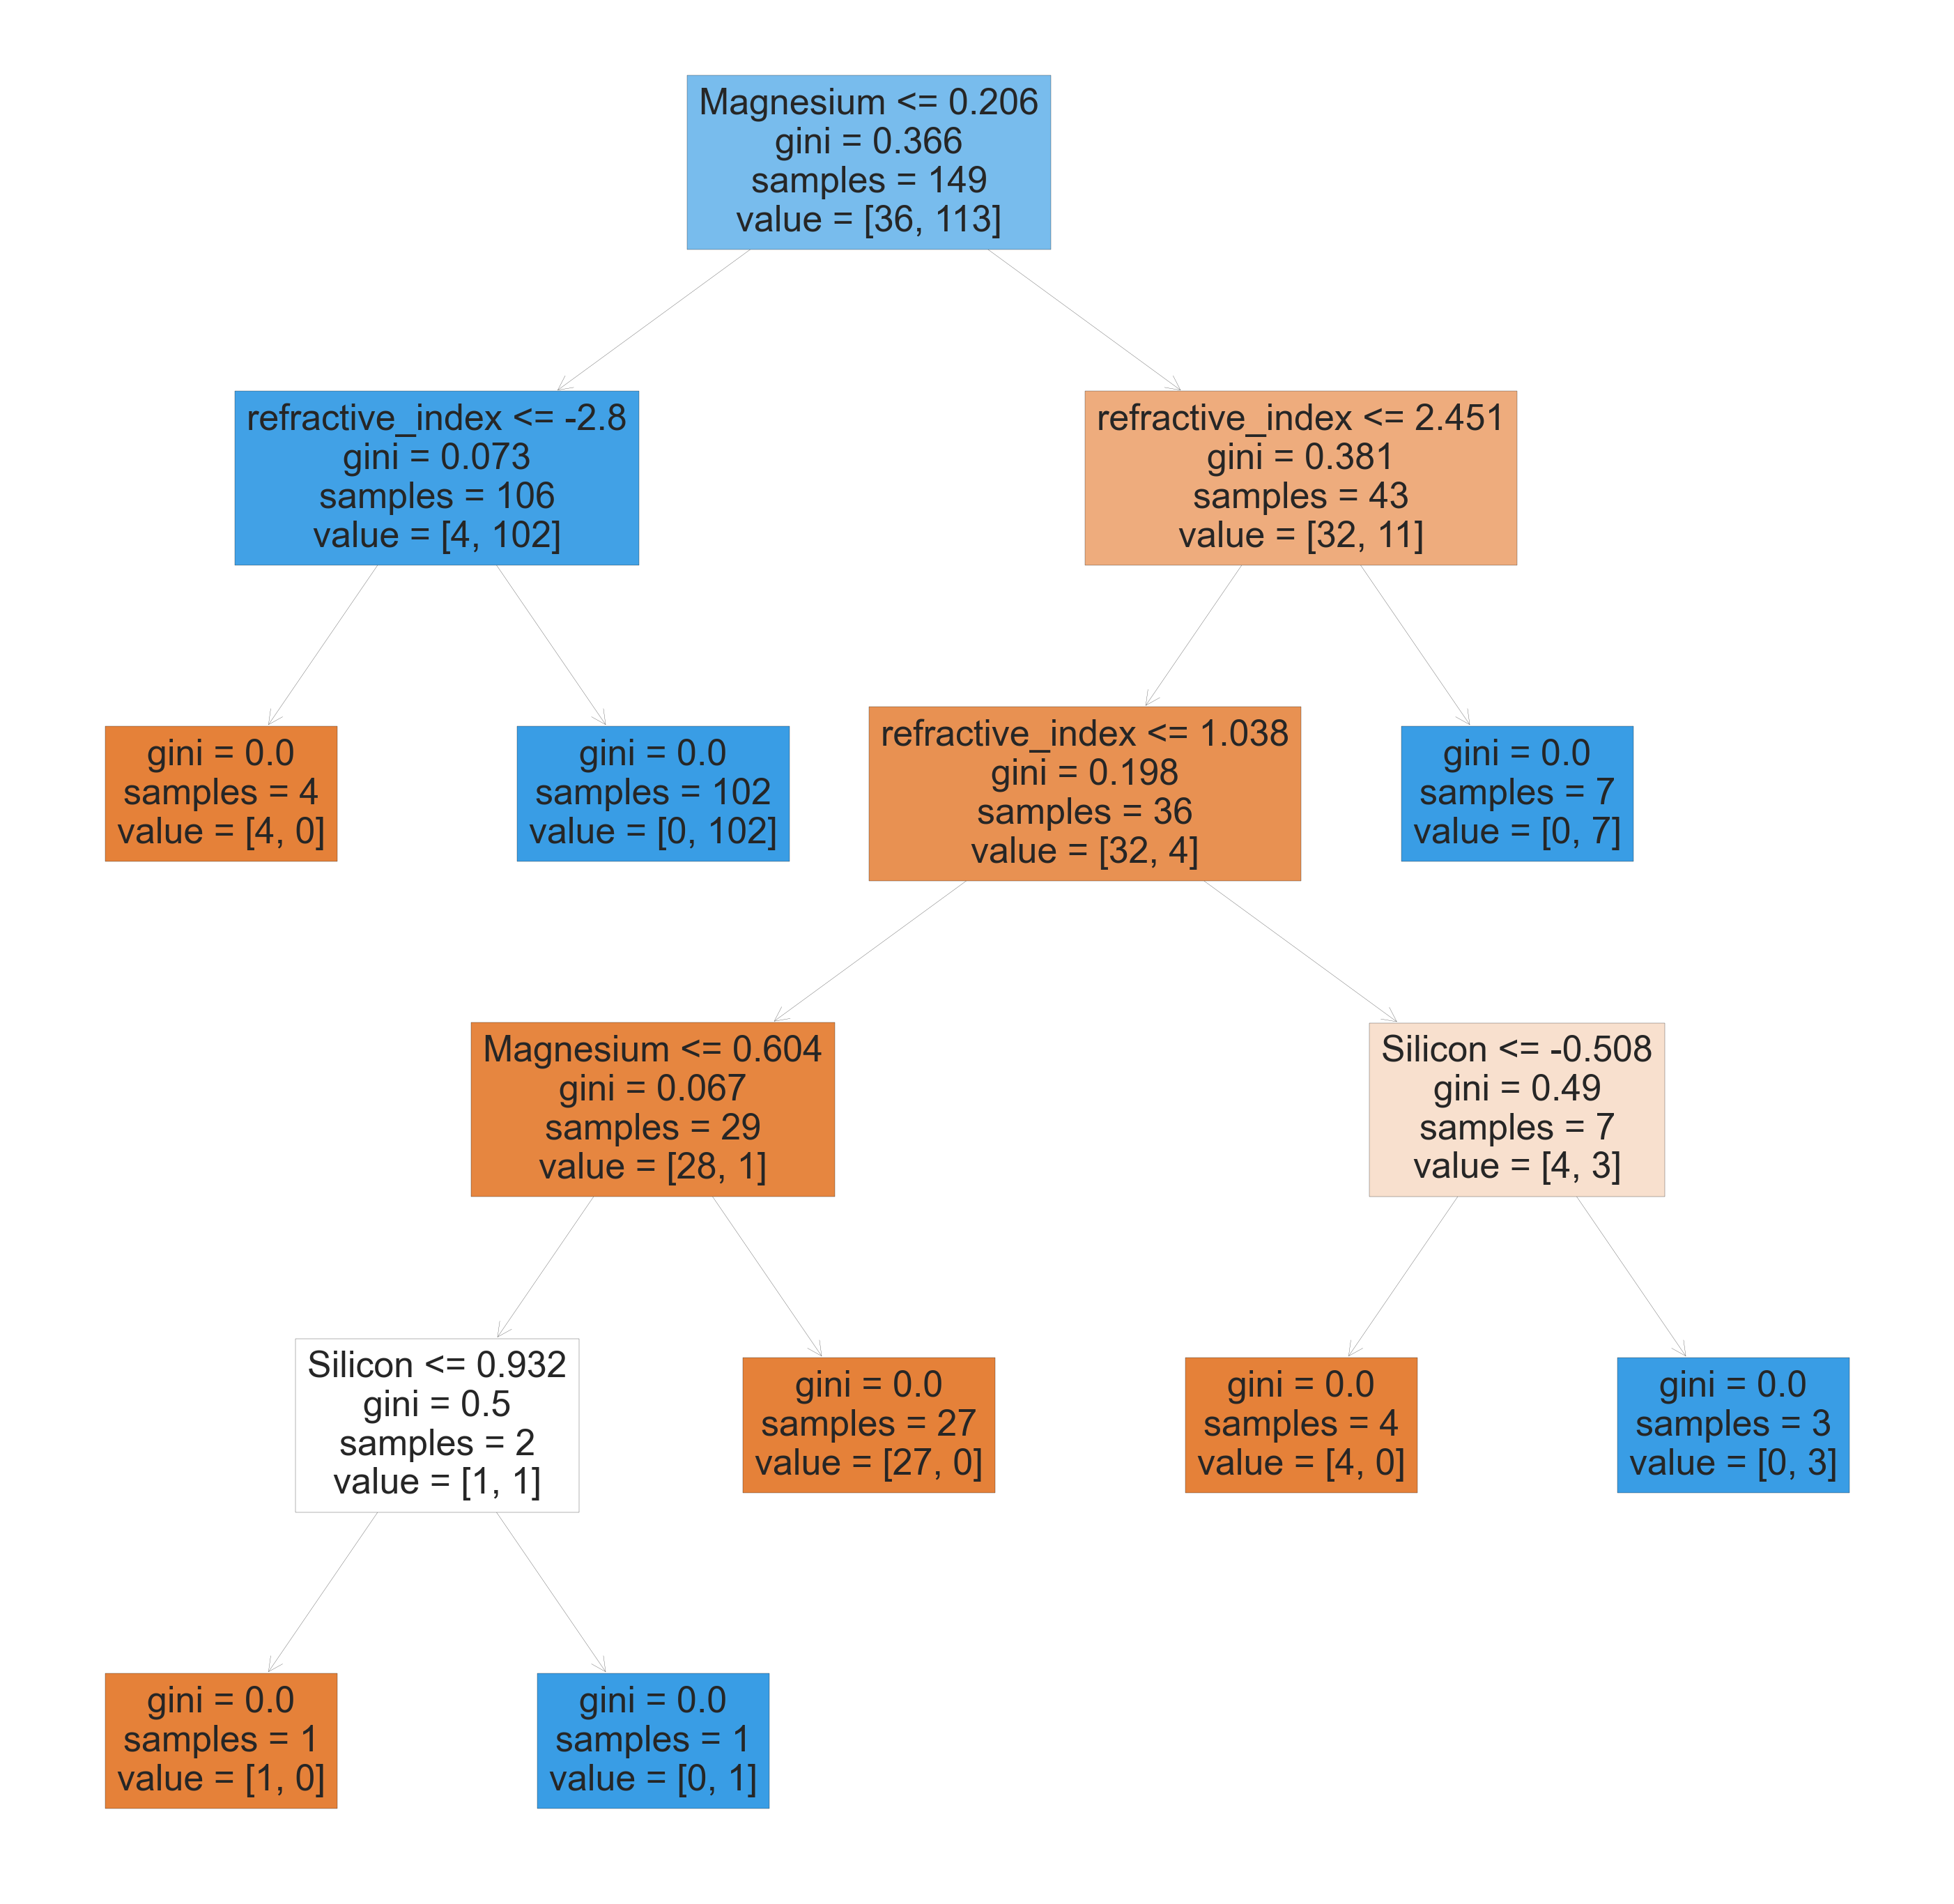

In [44]:
fig = plt.figure(figsize=(50,50))
_ = tree.plot_tree(dt, feature_names=X_train.columns, filled=True)

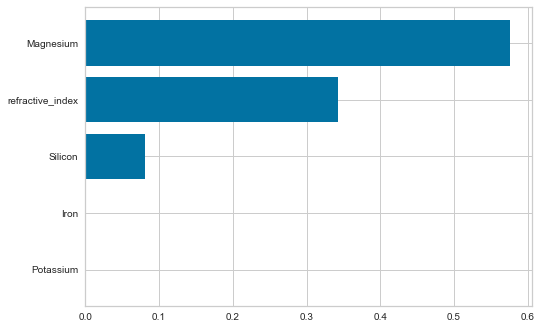

In [45]:
imp_feat = dt.feature_importances_
indices = np.argsort(imp_feat)

fig, ax = plt.subplots()
ax.barh(range(len(imp_feat)), imp_feat[indices])
ax.set_yticks(range(len(imp_feat)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])

# Model 5: Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier().fit(X_train, y_train)

C:\Users\Alan\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


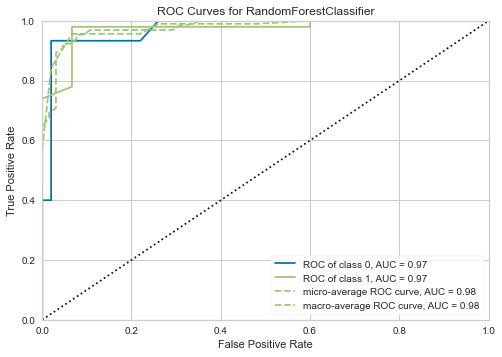

In [47]:
rocauc(rf, X_train, y_train,X_test, y_test)

In [48]:
probs = rf.predict_proba(X_test)[:,1]
roc_rf = roc_auc_score(y_test, probs)
roc_rf

0.9733333333333333

C:\Users\Alan\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


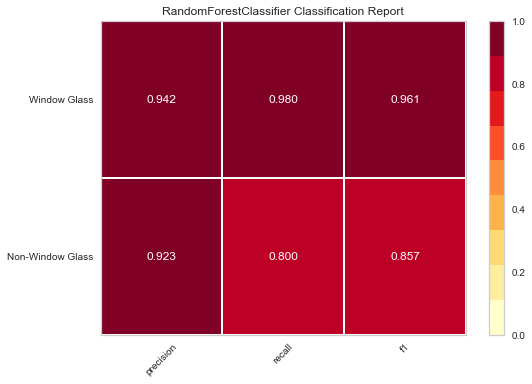

In [49]:
ClassificationRep(rf, X_train, y_train,X_test, y_test)

C:\Users\Alan\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


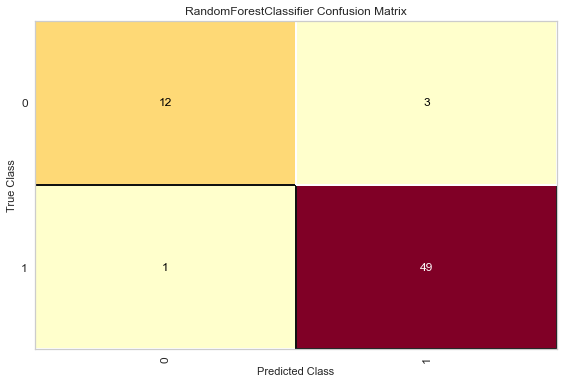

In [50]:
ConfusionMat(rf, X_train, y_train,X_test, y_test)

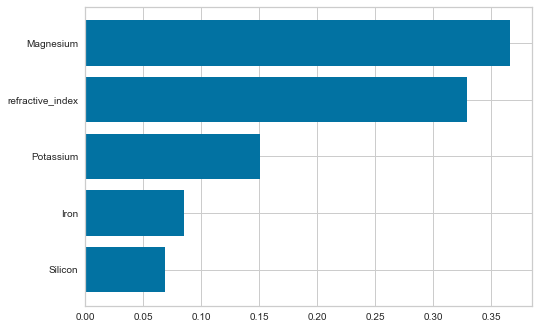

In [51]:
imp_feat = rf.feature_importances_
indices = np.argsort(imp_feat)

fig, ax = plt.subplots()
ax.barh(range(len(imp_feat)), imp_feat[indices])
ax.set_yticks(range(len(imp_feat)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])

In [53]:
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydot
import random
model = RandomForestClassifier(n_estimators=100,max_depth=3).fit(X_train, y_train)
estimator1 = model.estimators_[random.randint(0,100)]
estimator2 = model.estimators_[random.randint(0,100)]
estimator3 = model.estimators_[random.randint(0,100)]
estimator = [estimator1, estimator2, estimator3]
for i, est in zip(range(3), estimator):  
    dot_data = StringIO()
    export_graphviz(est, out_file=dot_data,  
                    filled=True, rounded=True,
                    node_ids=True,
                    feature_names=X_train.columns,
                    special_characters=True)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())  
    (graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
    graph.write_png('random_tree'+str(i+1)+'.png')
    Image(graph.create_png())

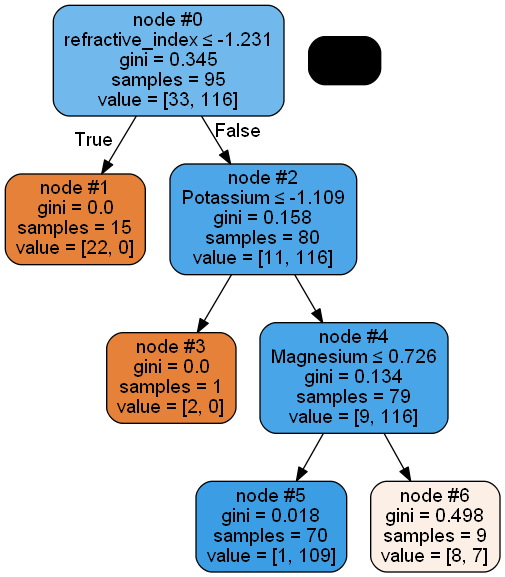

In [57]:
from PIL import Image
  
# Read image
img = Image.open('random_tree1.png')
  
# Output Images
img1

If refractive_index not <= -1.231 & Potassium not <= - 1.109 & Magnesium not <= 0.726 , glass type will most probably a 'Window Glass'. [Node 5]

If refractive_index <= -1.231 then the glass type will most probably a 'Non-Window Glass'. [Node 1]

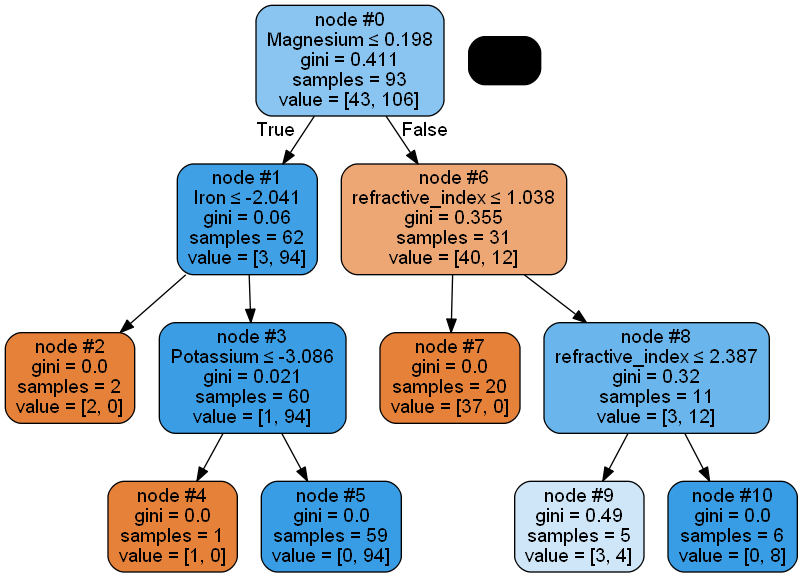

In [58]:
img2 = Image.open('random_tree2.png')
img2

If Magnesium <= 0.198 & Iron <= -2.041 & Potassium <= -3.086 , glass type will most probably a 'Window Glass' [Node5]

If Magnesium not <= 0.198 & refractive_index not <= 1.038 then the glass type will most probably a 'Non-Window Glass' [Node7].

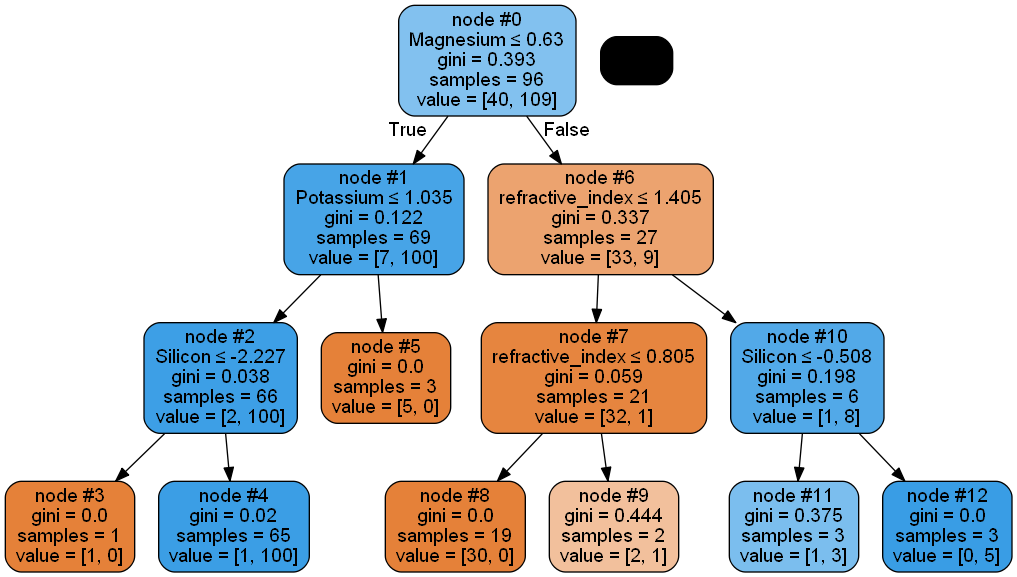

In [59]:
img3 = Image.open('random_tree3.png')
img3

If Magnesium <= 0.63 & Potassium <= 1.035 & Silicon <= -2.227 , glass type will most probably a 'Window Glass'. [Node 4]

If Magnesium not <= 0.3 & refractive_index not <= 1.405 & refractive_index not <= 0.805 then the glass type will most probably a 'Non-Window Glass'. [Node 8]

# Final Interpretations

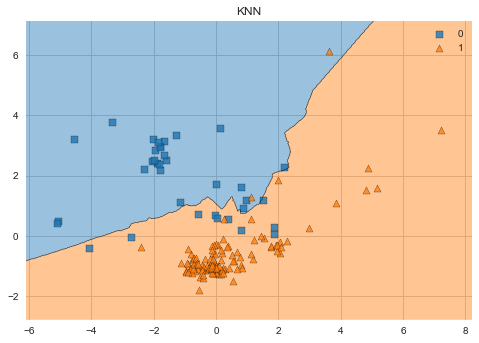

[LibSVM]

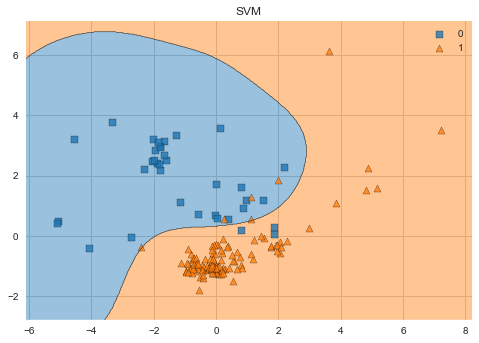

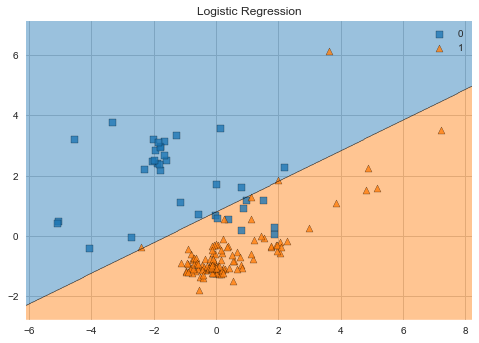

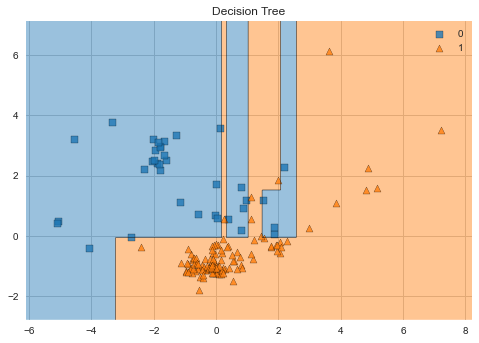

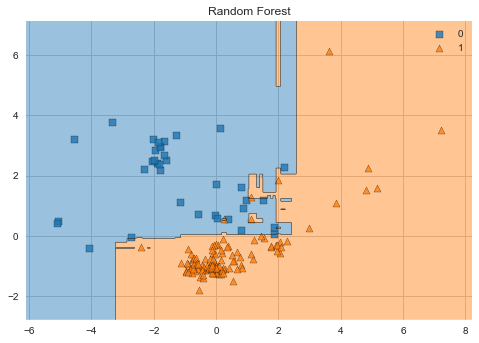

In [60]:
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
def visual_ml(clf1, clf2, clf3,clf4,clf5, X, y):
    y = np.array(y, dtype = np.uint)
    pca = PCA(n_components = 2)
    X = pca.fit_transform(X)
    eclf = EnsembleVoteClassifier(clfs = [clf1, clf2, clf3, clf4, clf5], verbose = 2)
    labels = ['KNN',
              'SVM',
              'Logistic Regression',
              'Decision Tree',
              'Random Forest']
    for clf, lab in zip([clf1, clf2, clf3, clf4, clf5], labels):
        clf.fit(X, y)
        plt.figure()
        fig = plot_decision_regions(X=X, y=y, clf=clf)
        plt.title(lab)
        plt.show()
        plt.close()
visual_ml(neigh,svm_clf,lr,dt,rf,X_train, y_train)

In [61]:
datam=[['Logistic Regression',roc_lr],
       ['KNN',roc_knn,],
       ['SVM',roc_svm],
       ['Decision Tree',roc_dt],
       ['Random Forest',roc_rf]]
dframe=pd.DataFrame(datam,columns=['Model','ROC score'])
dframe[['ROC score']] = dframe[['ROC score']].round(decimals = 2)
dframe

,Model,ROC score
0,Logistic Regression,0.94
1,KNN,0.96
2,SVM,0.96
3,Decision Tree,0.88
4,Random Forest,0.97


# The Best Models are RandForest , SVM and KNN.